In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import scipy.io as sio

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   

# Part 1: Loading and Visualizing Data

In [4]:
data = sio.loadmat(file_name='ex3data1.mat')

In [5]:
X = data['X']
m = np.shape(X)[0]
y = np.reshape(data['y'], [m])


In [6]:
rand_indices = np.array(m * np.random.random(m), dtype=np.int )

In [7]:
rand_indices

array([3546, 3655, 3517, ..., 1270,  537, 1135])

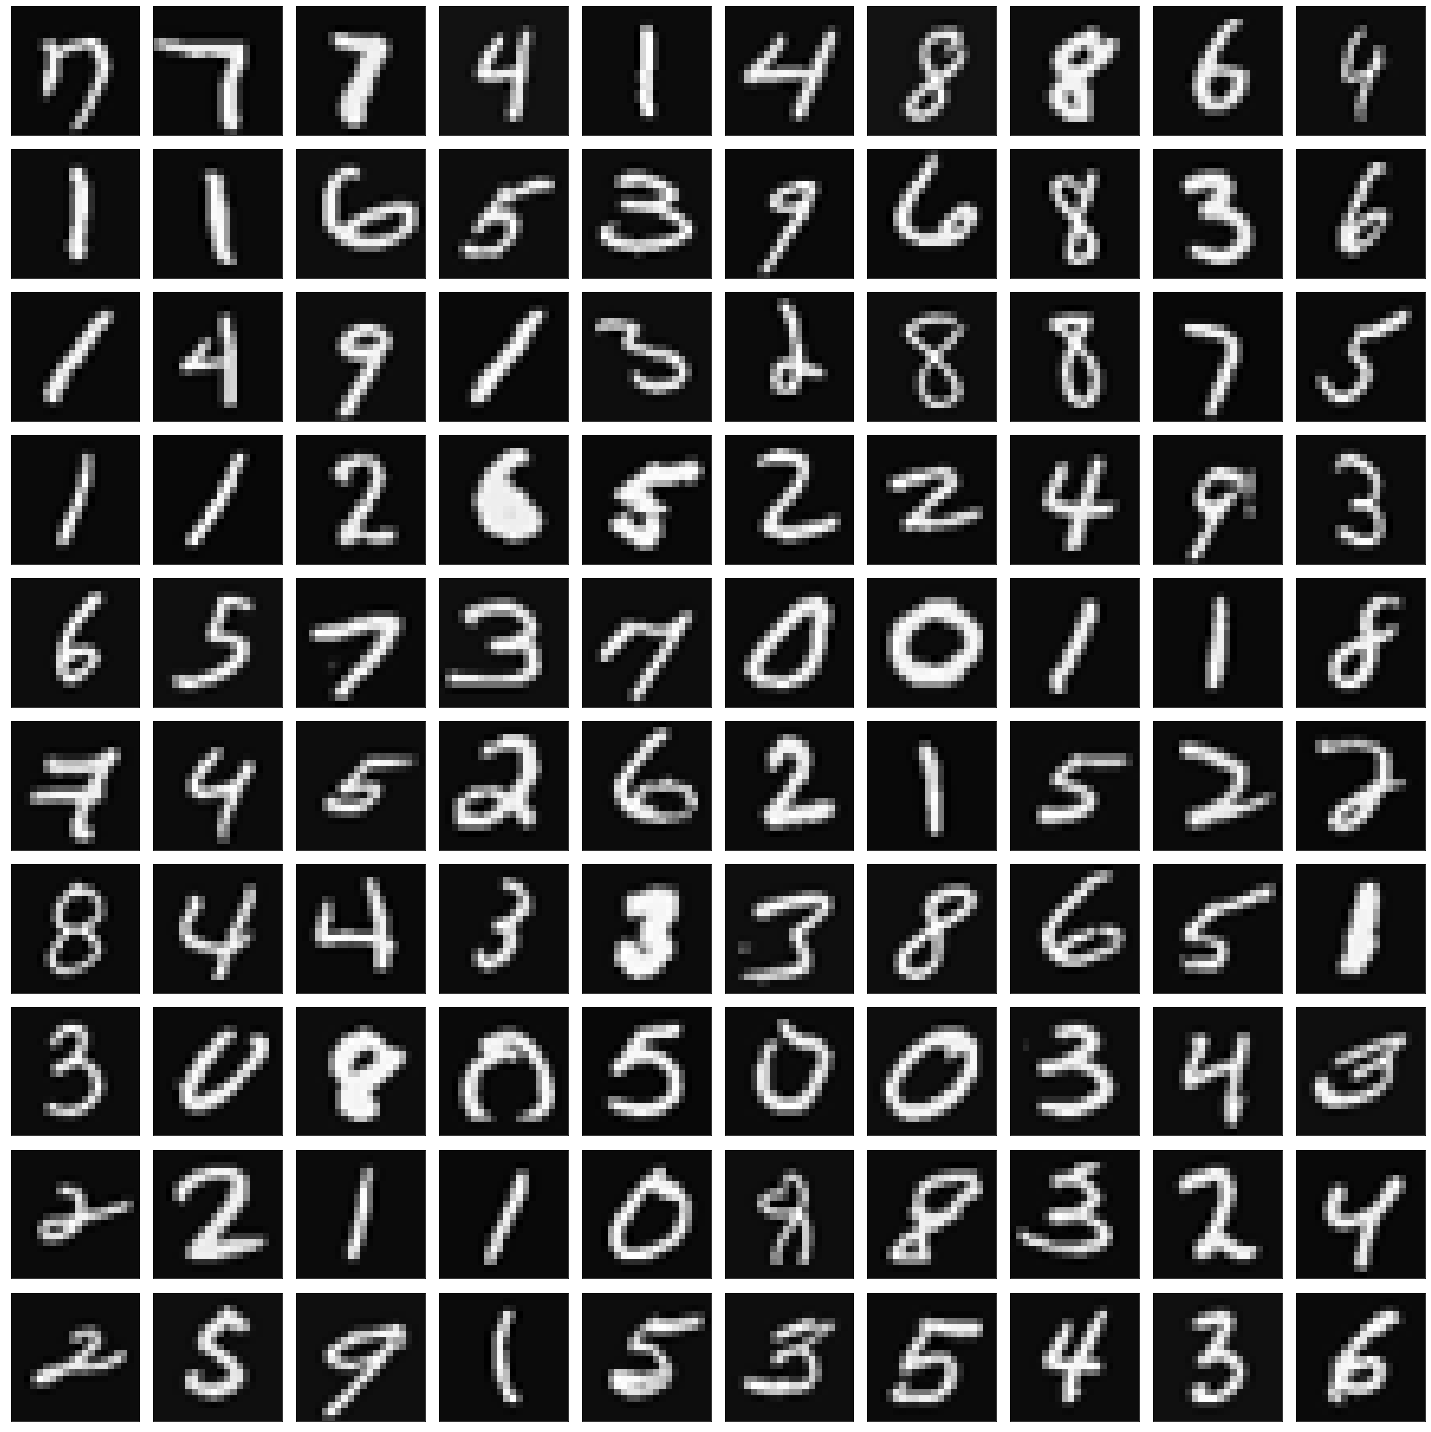

In [8]:
fig, axs = plt.subplots( figsize=(20,20), nrows=10, ncols=10, subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    
    ax.imshow( np.transpose(np.reshape(X[rand_indices[i]], [20,20] )), cmap='gist_gray' )

fig.tight_layout()

In [10]:
import plotly.express as px

In [ ]:
nrows = 10
ncols = 10 

fig = make_subplots(rows=nrows , cols=ncols,
                   vertical_spacing=0.002,
                   horizontal_spacing=0.002)

for i in range(nrows):
    for j in range(ncols):
        fig.add_trace( go.Heatmap( z=np.flip(np.transpose(np.reshape((X[rand_indices[j+i*10]] ), [20,20] )), axis =0 ),
                                   showscale=False, colorscale='Gray'
                                ), 
                       row=i+1, col=j+1   )

fig.update_yaxes(showticklabels=False)
fig.update_xaxes(showticklabels=False)
fig.update_layout(margin = dict(t=9,r=9,b=9,l=9),
                  showlegend = False,
                  width = 800, height = 800,
                  autosize = True
                 )

fig.show()

# Part 2: Loading Pameters

In [9]:
data_weights = sio.loadmat(file_name='ex3weights.mat')

In [10]:
Theta1 = data_weights['Theta1']
Theta2 = data_weights['Theta2']

# Part 3: Implement Predict

In [11]:
def sigmoid(z):
    
    g = 1.0/(1 + np.exp(-z)  )
    
    return g 

In [37]:
def predict(Theta1, Theta2, x):
    
    m = np.shape(x)[0]
    
    num_labels = np.shape(Theta2)[0]

    p = np.zeros([m])
    
    a1 = np.ones([m,np.shape(x)[1]+1])
    a1[:,1:] = x
    
    z2 = np.dot(a1,np.transpose(Theta1))
    a2_prime = sigmoid( z2 )
    
    a2 = np.ones([m,np.shape(a2_prime)[1]+1])
    a2[:,1:] = a2_prime 
    
    z3 = np.dot(a2,np.transpose(Theta2))
    a3 = sigmoid( z3 )
    
    p = np.argmax( a3 , axis = 1) +1 
    
    return p
    


In [38]:
pred = predict(Theta1, Theta2, X)

In [39]:
print(f'Training Set Accuracy: { np.mean( pred == y) * 100 }')

Training Set Accuracy: 97.52


In [15]:
rp = np.random.permutation(m)

In [ ]:
for i in range(m):
    
    print('Displaying Example Image');
    
    fig, ax = plt.subplots( figsize=(10,10), subplot_kw={'xticks': [], 'yticks': []})
    ax.imshow( np.transpose(np.reshape(X[rp[i],:], [20,20] )), cmap='gist_gray' )
    fig.tight_layout()
    plt.show()

    pred = predict(Theta1, Theta2, np.reshape(X[rp[i],:] , [1,400]  ))
    
    print(f'Neural Network Prediction: {pred} (digit {pred%10 })', );
    
    
    s = input('Paused - press enter to continue, q to exit:')
    if s == 'q':
        break
    
    

Displaying Example Image


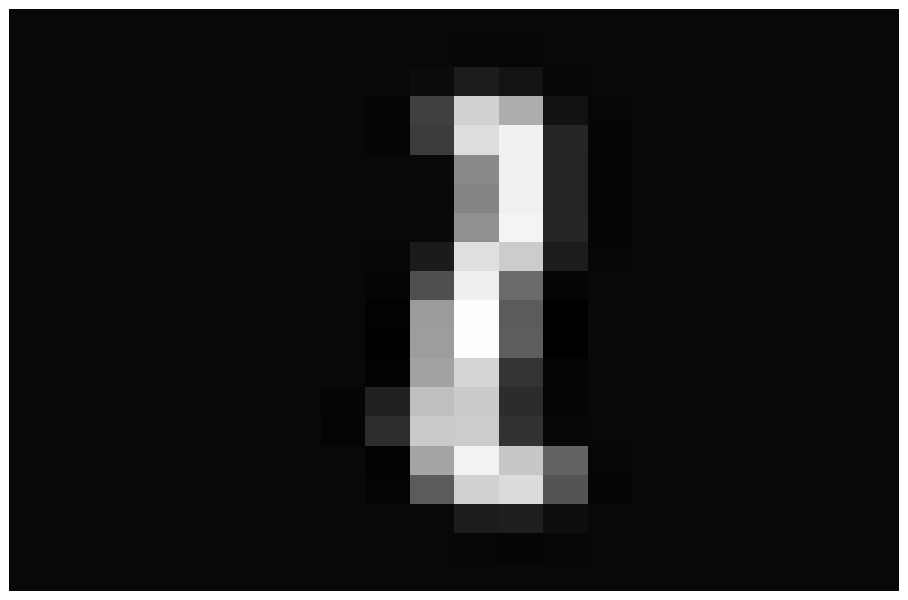

Neural Network Prediction: [1] (digit [1])


Paused - press enter to continue, q to exit: 2


Displaying Example Image


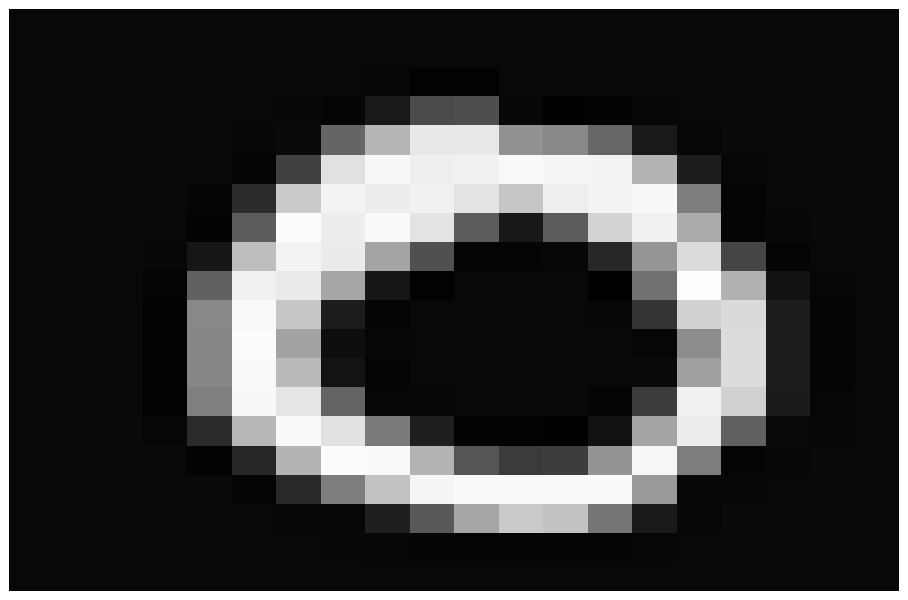

Neural Network Prediction: [10] (digit [0])


Paused - press enter to continue, q to exit: 


Displaying Example Image


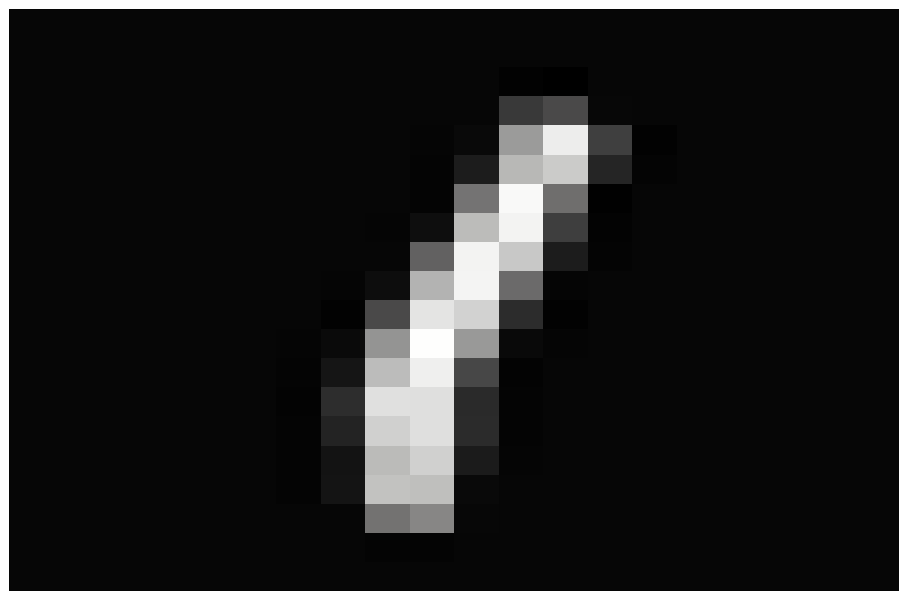

Neural Network Prediction: [1] (digit [1])


Paused - press enter to continue, q to exit: 


Displaying Example Image


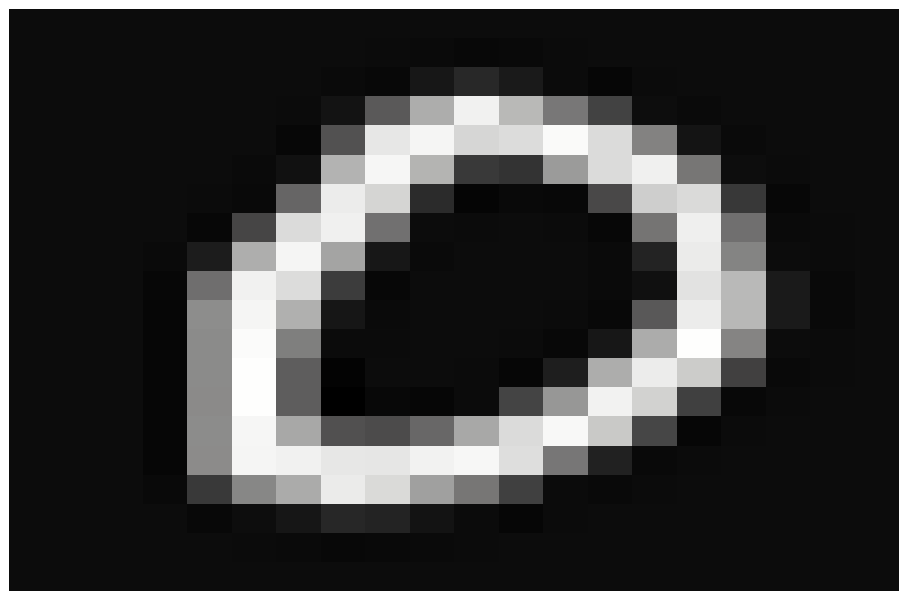

Neural Network Prediction: [10] (digit [0])


Paused - press enter to continue, q to exit: 


Displaying Example Image


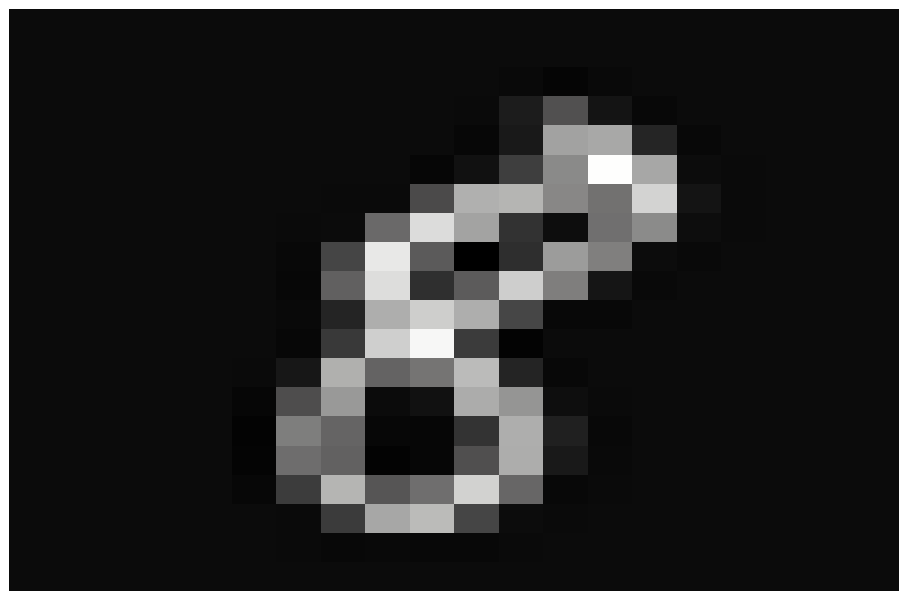

Neural Network Prediction: [8] (digit [8])


Paused - press enter to continue, q to exit: q


In [47]:
fig = make_subplots(rows=1 , cols=1,
                   vertical_spacing=0.002,
                   horizontal_spacing=0.002)

for i in range(m):
    
    print('Displaying Example Image');
    
    fig.add_trace( go.Heatmap( z=np.flip(np.transpose(np.reshape((X[rp[i]] ), [20,20] )), axis =0 ),
                               showscale=False, colorscale='Gray'
                            ), 
                       row=1, col=1   )
    
    fig.update_yaxes(showticklabels=False)
    fig.update_xaxes(showticklabels=False)
    
    fig.update_layout(margin = dict(t=9,r=9,b=9,l=9),
                      showlegend = False,
                      width = 600, height = 600,
                      autosize = True
                     )

    fig.show()
    
    pred = predict(Theta1, Theta2, np.reshape(X[rp[i],:] , [1,400]  ))
    
    print(f'Neural Network Prediction: {pred} (digit {pred%10 })', );
    
    
    s = input('Paused - press enter to continue, q to exit:')
    if s == 'q':
        break

